In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [13]:
df=pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


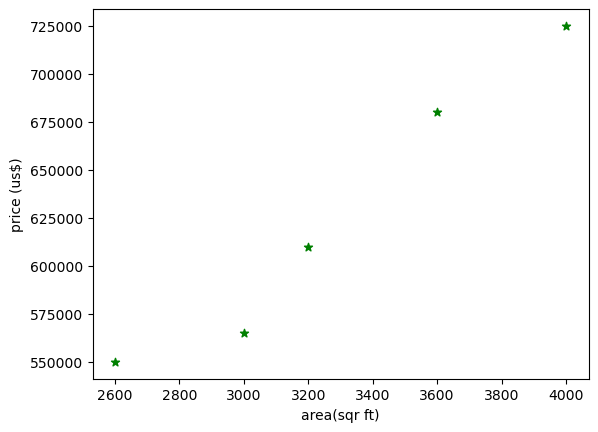

In [14]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price (us$)')
plt.scatter(df.area,df.price,color='green',marker='*')


In [15]:
# first have to creat an objeect for linear regresson
reg=linear_model.LinearRegression()
# now we have to train our model
reg.fit(df[['area']],df.price)

LinearRegression()

In [16]:
# now lets predict
reg.predict([[3300]])

C:\Users\Alamin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [17]:
reg.coef_

array([135.78767123])

In [18]:
reg.intercept_

180616.43835616432

In [19]:
reg.predict([[5000]])

C:\Users\Alamin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [20]:
d=pd.read_csv("areas.csv")
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [21]:
reg.predict(d)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [22]:
p=reg.predict(d)

In [23]:
d['prices']=p

In [24]:
# by this we have created a new csv file where both the areas and the prediction made by the
#linear model is there
d.to_csv("prediction.csv")

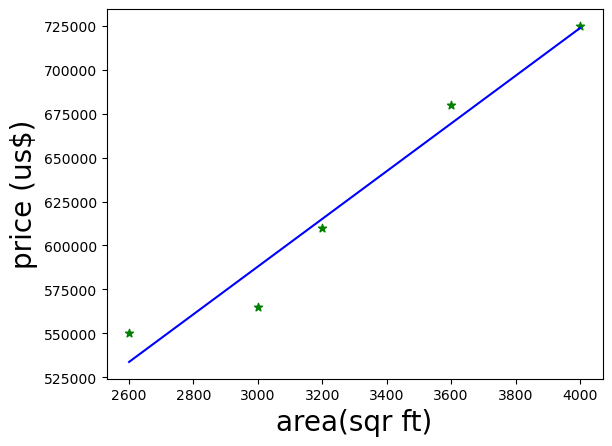

In [25]:
%matplotlib inline
plt.xlabel('area(sqr ft)',fontsize =20)
plt.ylabel('price (us$)',fontsize=20)
plt.scatter(df.area,df.price,color='green',marker='*')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [26]:
import pickle

In [27]:
import pickle

# Assuming 'model' is the object you want to serialize and save
with open('model_pickle', 'wb') as f:
    pickle.dump(reg, f)

In [28]:
with open('model_pickle', 'rb') as f:
    mp=pickle.load(f)
    

In [48]:
import numpy as np

# Assuming mp is a model and you want to predict the value for input '5000'
input_data = np.array([[5000]])  # Convert the input data to numeric values explicitly
mp.predict(input_data)

C:\Users\Alamin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [50]:
import joblib

In [52]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [54]:
mj=joblib.load('model_joblib')

In [60]:
# Convert the input data to numeric values explicitly before passing it to the predict method
input_data = [['5000']]
numeric_data = [[float(value) for value in row] for row in input_data]
mj.predict(numeric_data)

C:\Users\Alamin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])